In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
'''
Returns the sum of 2 vectors of not necesseraly the same length by appending 0's to the shorter vector.
'''
def sum_two_vec_pad(a, b):
    if len(a) < len(b):
        c = b.copy()
        c[:len(a)] += a
    else:
        c = a.copy()
        c[:len(b)] += b
    return c

'''
returns the energy for an estimated weight vector omega, with data (X, Y)
'''
def energy(w, X, Y):
    Y_est = np.sign(np.dot(X, w))
    return 0.5 * np.sum((Y - Y_est)**2)

def accept_prob(wp, w, beta, X, Y):
    return min(1, np.exp(-beta*(energy(wp, X, Y) - energy(w, X, Y))))

def overlap(wp, w):
    return 1.0 / (w.shape[0]) * np.dot(w, wp)

In [16]:
###

### Part 1

###


################ 3.

def metropolis3(w_init, beta, X, Y, epsilon, T):

    N = w_init.shape[0]
    M = X.shape[0]
    w = np.copy(w_init)
    wp = np.copy(w)
    
    count = 0
    while (energy(w, X, Y)/M > epsilon) and count < T:

        index_rand = np.random.randint(0, N)
        wp = np.copy(w)
        wp[index_rand] = -1 * wp[index_rand]

        if np.random.uniform() < accept_prob(wp, w, beta, X, Y):
            w = np.copy(wp)
        
        count += 1
    return w

def metropolis_mult3(nb_runs, N, alpha_list, beta, epsilon, T):

    overlap_per_alpha = np.array([])

    for alpha in alpha_list:
        print(alpha, beta)
        M = int(round(alpha * N))

        overlap_acc = np.zeros(nb_runs)
        
        for i in range(nb_runs):

            w = 2 * np.random.random_integers(0, 1, N) - 1
            X = np.random.randn(M, N)
            Y = np.sign(np.dot(X, w))

            w_init = 2 * np.random.random_integers(0, 1, N) - 1
            
            wp = metropolis3(w_init, beta, X, Y, epsilon, T)
            
            overlap_acc[i] = overlap(wp, w)

        overlap_per_alpha = np.append(overlap_per_alpha, np.mean(overlap_acc))

    return overlap_per_alpha

In [25]:
################

# Tests for part 3.

# alpha and beta in [0.5, 5], for 'interesting' results as per paper.
N = 40
betas = [0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6]

alpha_list = np.linspace(0.5,5,10)
nb_runs = 100
epsilon = 0
T = 5000
results = []

for beta in betas:
    result_tmp = metropolis_mult3(nb_runs, N, alpha_list, beta, epsilon, T)
    results.append(result_tmp)

0.5 0.4


C:\Users\furkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
C:\Users\furkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


1.0 0.4
1.5 0.4
2.0 0.4
2.5 0.4
3.0 0.4
3.5 0.4
4.0 0.4
4.5 0.4
5.0 0.4
0.5 0.6
1.0 0.6
1.5 0.6
2.0 0.6
2.5 0.6
3.0 0.6
3.5 0.6
4.0 0.6
4.5 0.6
5.0 0.6
0.5 0.8
1.0 0.8
1.5 0.8
2.0 0.8
2.5 0.8
3.0 0.8
3.5 0.8
4.0 0.8
4.5 0.8
5.0 0.8
0.5 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
4.0 1
4.5 1
5.0 1
0.5 1.2
1.0 1.2
1.5 1.2
2.0 1.2
2.5 1.2
3.0 1.2
3.5 1.2
4.0 1.2
4.5 1.2
5.0 1.2
0.5 1.4
1.0 1.4
1.5 1.4
2.0 1.4
2.5 1.4
3.0 1.4
3.5 1.4
4.0 1.4
4.5 1.4
5.0 1.4
0.5 1.6
1.0 1.6
1.5 1.6
2.0 1.6
2.5 1.6
3.0 1.6
3.5 1.6
4.0 1.6
4.5 1.6
5.0 1.6


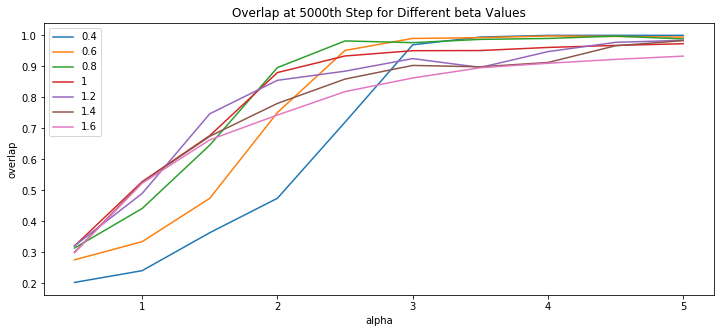

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
for i, beta in enumerate(betas):
    ax.plot(alpha_list, results[i]);
ax.legend(labels=betas);
ax.set_xlabel("alpha");
ax.set_ylabel("overlap");
ax.set_title("Overlap at {}th Step for Different beta Values".format(T));

In [27]:
fig.savefig("part3.png")
fig.savefig("part3_tight.png",bbox_inches="tight")